In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel("/Users/sunayanababudas/Desktop/Crowdfunding_data_1000_projects.xlsx")
df

,Project_ID,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,...,resource_type,poverty_level,grade_level,Goal,students_reached,total_donations,num_donors,funding_status,date_posted,date_expiration
0,1,45.310140,-93.807736,Monticello,MN,55362,NaN,Monticello Ind School Dist 882,Wright,f,...,Technology,moderate poverty,Grades PreK-2,887.15,12,856.83,7,completed,2015-01-01 00:00:00,2015-05-01 00:00:00
1,2,29.795216,-95.358101,Houston,TX,77009,urban,Houston Ind School District,Harris,f,...,Books,highest poverty,Grades 3-5,761.52,63,125.00,3,NotCompleted,2015-01-01 00:00:00,2015-04-30 00:00:00
2,3,37.754852,-122.426160,San Francisco,CA,94114,urban,San Francisco Unified Sch Dist,San Francisco,t,...,Supplies,highest poverty,Grades PreK-2,266.55,88,266.56,6,completed,2015-01-01 00:00:00,2015-05-01 00:00:00
3,4,36.297083,-119.789619,Lemoore,CA,93245,suburban,Lemoore Union Elem Sd,Kings,f,...,Supplies,high poverty,Grades 3-5,808.15,30,25.00,1,NotCompleted,2015-01-01 00:00:00,2015-04-30 00:00:00
4,5,33.946010,-118.223360,South Gate,CA,90280,suburban,Los Angeles Unif Sch Dist,Los Angeles,f,...,Other,high poverty,Grades 9-12,1296.65,92,1296.65,1,NotCompleted,2015-01-01 00:00:00,2015-05-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,27.712243,-97.425700,Corpus Christi,TX,78415,urban,Corpus Christi Ind Sch Dist,Nueces,f,...,Supplies,highest poverty,Grades PreK-2,168.40,20,168.40,2,completed,2015-01-05 00:00:00,2015-05-04 00:00:00
996,997,35.957050,-80.019836,High Point,NC,27262,urban,Guilford Co Schools,Guilford,f,...,Supplies,highest poverty,Grades 6-8,355.07,100,355.08,5,completed,2015-01-05 00:00:00,2015-05-05 00:00:00
997,998,42.156029,-71.565903,Dorchester,MA,2124,NaN,Boston Public School District,Suffolk,f,...,Supplies,highest poverty,Grades 6-8,1110.75,75,1083.40,19,completed,2015-01-05 00:00:00,2015-05-04 00:00:00
998,999,42.926026,-85.626478,Grand Rapids,MI,49506,urban,Grand Rapids Pub Sch Dist,Kent,f,...,Technology,highest poverty,Grades 9-12,2392.41,15,556.00,8,NotCompleted,2015-01-05 00:00:00,2015-05-05 00:00:00


In [3]:
df1 = df[["Goal","students_reached","funding_status"]]

In [4]:
df1

,Goal,students_reached,funding_status
0,887.15,12,completed
1,761.52,63,NotCompleted
2,266.55,88,completed
3,808.15,30,NotCompleted
4,1296.65,92,NotCompleted
...,...,...,...
995,168.40,20,completed
996,355.07,100,completed
997,1110.75,75,completed
998,2392.41,15,NotCompleted


In [5]:
df1=df1.replace({"funding_status":{"completed":0,"NotCompleted":1}})

In [6]:
df1

,Goal,students_reached,funding_status
0,887.15,12,0
1,761.52,63,1
2,266.55,88,0
3,808.15,30,1
4,1296.65,92,1
...,...,...,...
995,168.40,20,0
996,355.07,100,0
997,1110.75,75,0
998,2392.41,15,1


In [7]:
train, test = train_test_split(df1, test_size = 0.25)

In [9]:
train

,Goal,students_reached,funding_status
289,510.55,20,0
162,815.24,12,1
452,1282.56,100,0
839,2184.64,22,0
415,1429.42,22,1
...,...,...,...
928,391.74,21,0
115,554.85,30,1
647,237.56,30,1
767,303.25,26,0


In [10]:
test

,Goal,students_reached,funding_status
145,283.06,17,0
398,443.86,400,1
294,493.92,23,1
900,313.95,18,0
382,382.16,25,1
...,...,...,...
950,379.27,500,0
775,507.13,40,0
133,482.47,22,0
123,476.98,12,1


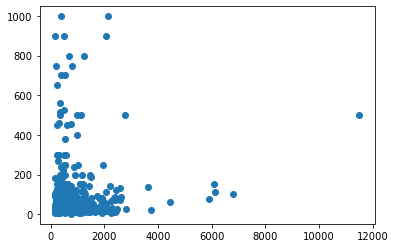

In [11]:
# Before Clustering 

plt.scatter(train[["Goal"]], train[["students_reached"]])

In [12]:
# KMeans Cluster 

kmeans = KMeans(n_clusters=2).fit(train[['Goal','students_reached']])

In [13]:
kmeans.labels_

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

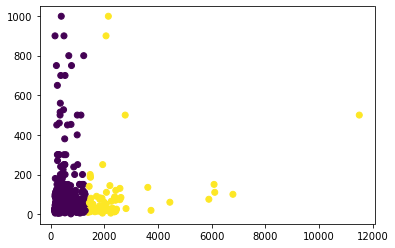

In [14]:
plt.scatter(train[['Goal']], train[['students_reached']],c=np.array(kmeans.labels_))

In [15]:
predicted = kmeans.predict(test[['Goal','students_reached']])

In [16]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

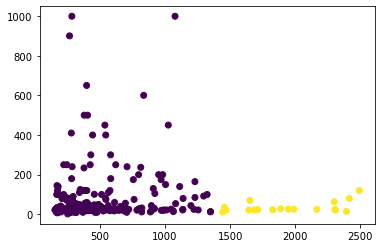

In [17]:
plt.scatter(test[['Goal']], test[['students_reached']],c=np.array(predicted))